# Telecom Plans Project

In [23]:
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
from functools import reduce
import math

calls = pd.read_csv('megaline_calls.csv')
messages = pd.read_csv('megaline_messages.csv')
internet = pd.read_csv('megaline_internet.csv')
users = pd.read_csv('megaline_users1.csv')
plans = pd.read_csv('megaline_plans.csv')

We first import the libraries necessary to process and analyze the data, and we initialize the files as variables. We'll now take a look to see which variables we need to process in our datasets. We'll start with our calls.

In [24]:
calls.info()
calls.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Calling the info() method reveals that there aren't any null values to preprocess. Great! Now we'll glance at the columns. We need to find the average calls and call duration per month, so we need to:

1. group rows by user_ID
2. total the duration of calls and count the amount of calls for each user
3. find the monthly average for calls and call duration for each user

Looking at the duration column, we can see a 0 value in row 19. **Assuming 0 duration means a missed call, we're going to exclude those values** from our dataset to get a closer average.


In [25]:
#remove all missed calls
processed_calls = calls[calls['duration']> 0]

#approximately 20000 calls have been removed - missed calls could have had a significant impact on our average.
processed_calls.info()

#group by user id, and sum duration, and count rows for each user
grouped_calls = processed_calls.groupby('user_id',as_index=False).agg({'duration': 'sum', 'call_date': 'count'})

#rename columns
grouped_calls.columns = ['user_id', 'duration','calls']

#add averages for each month
grouped_calls['avg_duration_per_month'] = grouped_calls['duration']/12
grouped_calls['avg_calls_per_month'] = grouped_calls['calls']/12

grouped_calls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         110901 non-null  object 
 1   user_id    110901 non-null  int64  
 2   call_date  110901 non-null  object 
 3   duration   110901 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration,calls,avg_duration_per_month,avg_calls_per_month
0,1000,116.83,16,9.735833,1.333333
1,1001,1640.46,202,136.705000,16.833333
2,1002,777.13,94,64.760833,7.833333
3,1003,1041.00,118,86.750000,9.833333
4,1004,2618.95,306,218.245833,25.500000
...,...,...,...,...,...
476,1495,1666.41,208,138.867500,17.333333
477,1496,1376.21,158,114.684167,13.166667
478,1497,276.53,42,23.044167,3.500000
479,1498,3029.97,371,252.497500,30.916667


Now that we've preprocessed our calls dataset, we can move onto text messages.

In [26]:
messages.info()
messages.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


This is quite simple. All we need to do is:
1. group our data by user_id
2. count the amount of texts for each user
3. find the average amount of texts per month for each user

In [27]:
#group by user id and count number of texts
grouped_messages = messages.groupby('user_id').size().reset_index(name='total_texts')

#find average texts per month
grouped_messages['avg_texts_per_month'] = grouped_messages['total_texts']/12
grouped_messages

,user_id,total_texts,avg_texts_per_month
0,1000,11,0.916667
1,1001,207,17.250000
2,1002,88,7.333333
3,1003,50,4.166667
4,1004,177,14.750000
...,...,...,...
397,1491,409,34.083333
398,1492,108,9.000000
399,1494,174,14.500000
400,1496,65,5.416667


After processing this data, we can now calculate customer internet usage.

In [28]:
internet.info()
internet.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Similar to our calls, we're going to:
1. group rows by user ID
2. determine the total MB used for each user
3. calculate the average MB used per month for each user

From a quick glance we can also see that some sessions used 0 MB. They probably connected to wifi during these sessions, so **we'll exclude these from our dataset**.

In [29]:
#remove all 0 MB sessions
processed_data_usage = internet[internet['mb_used']> 0]

#approximately 10000 rows have been removed
processed_data_usage.info()

#group by user id, and sum mb_used, and count rows for each user
grouped_data_usage = processed_data_usage.groupby('user_id',as_index=False).agg({'mb_used': 'sum'})

#rename columns
grouped_data_usage.columns = ['user_id', 'total_mb_used']

#add averages for each month
grouped_data_usage['avg_mb_per_month'] = grouped_data_usage['total_mb_used']/12

grouped_data_usage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            91078 non-null  object 
 1   user_id       91078 non-null  int64  
 2   session_date  91078 non-null  object 
 3   mb_used       91078 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ MB


,user_id,total_mb_used,avg_mb_per_month
0,1000,1901.47,158.455833
1,1001,80437.94,6703.161667
2,1002,40293.33,3357.777500
3,1003,27044.14,2253.678333
4,1004,156352.81,13029.400833
...,...,...,...
484,1495,98890.96,8240.913333
485,1496,64268.64,5355.720000
486,1497,11106.55,925.545833
487,1498,227525.13,18960.427500


We'll now merge our dataframes to determine monthly profit from each user.

In [30]:
#put all dataframes in a list
dfs = [users, grouped_calls,grouped_messages,grouped_data_usage]

#use reduce to combine dataframes
full_data = reduce(lambda x,y: pd.merge(x,y, on='user_id', how='outer'), dfs)

#check our data. Looks great.
full_data.info()
full_data.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 500 non-null    int64  
 1   first_name              500 non-null    object 
 2   last_name               500 non-null    object 
 3   age                     500 non-null    int64  
 4   city                    500 non-null    object 
 5   reg_date                500 non-null    object 
 6   plan                    500 non-null    object 
 7   churn_date              34 non-null     object 
 8   duration                481 non-null    float64
 9   calls                   481 non-null    float64
 10  avg_duration_per_month  481 non-null    float64
 11  avg_calls_per_month     481 non-null    float64
 12  total_texts             402 non-null    float64
 13  avg_texts_per_month     402 non-null    float64
 14  total_mb_used           489 non-null    fl

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,duration,calls,avg_duration_per_month,avg_calls_per_month,total_texts,avg_texts_per_month,total_mb_used,avg_mb_per_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,116.83,16.0,9.735833,1.333333,11.0,0.916667,1901.47,158.455833
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,1640.46,202.0,136.705000,16.833333,207.0,17.250000,80437.94,6703.161667
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,777.13,94.0,64.760833,7.833333,88.0,7.333333,40293.33,3357.777500
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1041.00,118.0,86.750000,9.833333,50.0,4.166667,27044.14,2253.678333
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,2618.95,306.0,218.245833,25.500000,177.0,14.750000,156352.81,13029.400833
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN,470.22,50.0,39.185000,4.166667,11.0,0.916667,17140.17,1428.347500
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,64.11,9.0,5.342500,0.750000,154.0,12.833333,34187.19,2848.932500
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN,2484.15,307.0,207.012500,25.583333,255.0,21.250000,143852.74,11987.728333
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1473.31,169.0,122.775833,14.083333,84.0,7.000000,55473.04,4622.753333
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN,5589.68,698.0,465.806667,58.166667,NaN,NaN,187237.74,15603.145000


Now we need to calculate average monthly profits from each user. We'll define a method that determines the profit based on which plan the user has.

In [31]:
#first we retrieve the plan types from the plans dataframe, and organize the data for each plan. we'll append these to a list that we'll use in our method.
plan_type = []
for index, row in plans.iterrows():
    info = [row.plan_name, row.usd_monthly_pay, row.minutes_included, row.usd_per_minute, row.messages_included, row.usd_per_message, row.mb_per_month_included, row.usd_per_gb]
    plan_type.append(info)

#now we have our data organized
print(plan_type)

'''
Now we define a function that will calculate monthly costs.

1. determine the plan type, and initialize plan_data variable according to the plan type.
2. initialize total variable
3. add the base cost
4. Determine if user exceeds any allowances, and add excess to avg_monthly_payment
5. return total
'''
def calculate_profit(plan, minutes, texts, mb):
    #initialize plan_data
    if plan == 'surf':
        plan_data = plan_type[0]
    else:
        plan_data = plan_type[1]
    
    #initialize monthly payment variable
    total = 0
    
    #add base cost
    base = plan_data[1]
    total += base
    
    #determine if user exceeds call allowance and add to total
    excess_call_dur = minutes - plan_data[2]
    if excess_call_dur > 0:
        #round up minute value
        excess_call_dur = math.ceil(excess_call_dur)
        total += excess_call_dur*plan_data[3]

    #determine if user exceeds text allowance
    excess_texts = texts - plan_data[4]
    if excess_texts > 0:
        excess_texts = math.ceil(excess_texts)
        total+= excess_texts*plan_data[5]
    
    #determine if user exceeds data allowance
    excess_data = mb - plan_data[6]
    if excess_data > 0:
        excess_gb = math.ceil(excess_data/1000)
        total+= excess_gb*plan_data[7]
        
    return total
    
    
    
# create monthly profit column by applying the calculate_profit() method to the df columns
full_data['monthly_profit'] = full_data.apply(lambda x: calculate_profit(x['plan'], x['avg_duration_per_month'], x['avg_texts_per_month'], x['avg_mb_per_month']), axis=1)

#let's see our results
full_data.head(5)

[['surf', 20, 500, 0.03, 50, 0.03, 15360, 10], ['ultimate', 70, 3000, 0.01, 1000, 0.01, 30720, 7]]


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,duration,calls,avg_duration_per_month,avg_calls_per_month,total_texts,avg_texts_per_month,total_mb_used,avg_mb_per_month,monthly_profit
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,116.83,16.0,9.735833,1.333333,11.0,0.916667,1901.47,158.455833,70.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,1640.46,202.0,136.705000,16.833333,207.0,17.250000,80437.94,6703.161667,20.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,777.13,94.0,64.760833,7.833333,88.0,7.333333,40293.33,3357.777500,20.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1041.00,118.0,86.750000,9.833333,50.0,4.166667,27044.14,2253.678333,20.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,2618.95,306.0,218.245833,25.500000,177.0,14.750000,156352.81,13029.400833,20.0


Now that we have all the necessary data, we can analyze the information that we extracted. We'll seperate the data determined by the user's plan type.

ultimate plan
------------------
minutes 
mean: 157.23603225806448 
variance: 17663.29223213336 
standard deviation: 132.90331911631614


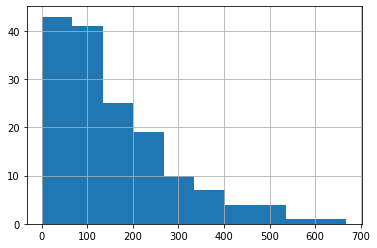

In [32]:
#query data by plan type
ultimate_data = full_data.query('plan == "ultimate"')
surf_data = full_data.query('plan == "surf"')

#get column with average minutes
ultimate_mins = ultimate_data['avg_duration_per_month']
#calculate variance
u_mins_variation = np.var(ultimate_mins)
#print plan mean, variance, and standard deviation
print('ultimate plan\n------------------')
print('minutes \nmean:', ultimate_mins.mean(), '\nvariance:', u_mins_variation, '\nstandard deviation:', np.sqrt(u_mins_variation))

#plot histogram
ultimate_mins.hist()

ultimate plan
------------------
minutes 
mean: 162.75338445807768 
variance: 18086.267558300908 
standard deviation: 134.48519456914545


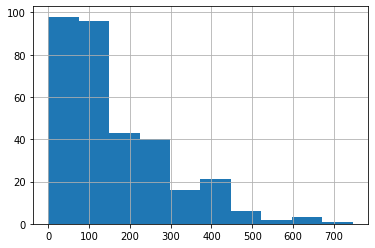

In [33]:
surf_mins = surf_data['avg_duration_per_month']
s_mins_variation = np.var(surf_mins)
print('ultimate plan\n------------------')
print('minutes \nmean:', surf_mins.mean(), '\nvariance:', s_mins_variation, '\nstandard deviation:', np.sqrt(s_mins_variation))

surf_mins.hist()

Customer behavior for average call duration per month is very similar between the ultimate plan and the surf plan, with the means and standard deviations being roughly the same. Both graphs have a similar range from 0-700 minutes. The median for both lie between 100-200 minutes, and the distribution for each are skewed to the right.

ultimate plan
------------------
texts 
mean: 17.06881313131313 
variance: 279.2679394162587 
standard deviation: 16.711311720396417


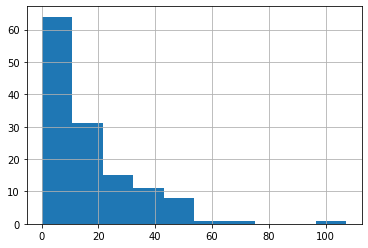

In [34]:
ultimate_texts = ultimate_data['avg_texts_per_month']
u_text_variation = np.var(ultimate_texts)
print('ultimate plan\n------------------')
print('texts \nmean:', ultimate_texts.mean(), '\nvariance:', u_text_variation, '\nstandard deviation:', np.sqrt(u_text_variation))

ultimate_texts.hist()

ultimate plan
------------------
texts 
mean: 15.127777777777775 
variance: 243.26319958847748 
standard deviation: 15.596897114121049


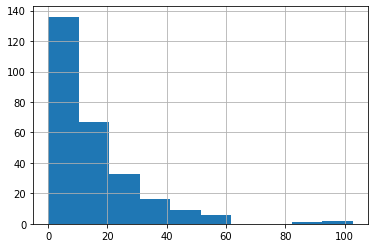

In [35]:
surf_texts = surf_data['avg_texts_per_month']
s_text_variation = np.var(surf_texts)
print('ultimate plan\n------------------')
print('texts \nmean:', surf_texts.mean(), '\nvariance:', s_text_variation, '\nstandard deviation:', np.sqrt(s_text_variation))

surf_texts.hist()

User data for average texts per month is quite similar as well, with the means and standard deviations being similar as well. Users on the ultimate plan have a slightly higher average of about 2 texts per month. Both graphs have a similar range between 0-50 texts per month, with some potential outliers. The medians are roughly the same at around 10 texts per month, and the distribution for both plans are skewed to the right.

ultimate plan
------------------
volume of data 
mean: 6578.866125265393 
variance: 30559701.788168985 
standard deviation: 5528.083012054811


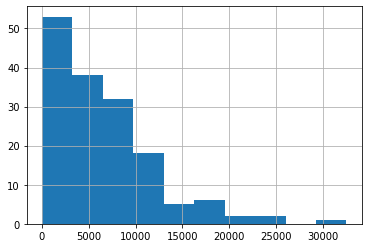

In [36]:
ultimate_mb = ultimate_data['avg_mb_per_month']
u_mb_variation = np.var(ultimate_mb)
print('ultimate plan\n------------------')
print('volume of data \nmean:', ultimate_mb.mean(), '\nvariance:', u_mb_variation, '\nstandard deviation:', np.sqrt(u_mb_variation))

ultimate_mb.hist()

surf plan
------------------
volume of data 
mean: 6537.695765562246 
variance: 24710213.623550035 
standard deviation: 4970.93689595332


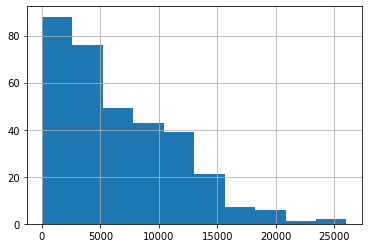

In [37]:
surf_mb = surf_data['avg_mb_per_month']
s_mb_variation = np.var(surf_mb)
print('surf plan\n------------------')
print('volume of data \nmean:', surf_mb.mean(), '\nvariance:', s_mb_variation, '\nstandard deviation:', np.sqrt(s_mb_variation))

surf_mb.hist()

User data for average volume of data used per month is roughly the same for both plans. The means lie at approximately 6500 mbs used per month, but one key difference is the variance and standard deviation is significantly larger for the ultimate plan, meaning that the dispersion for ultimate plan users is greater than the surf plan. Both graphs have similar ranges from 0-25000 mbs used per month, with the ultimate plan having more potential outliers. Both plans are once again skewed to the right.

We're now going to use our data to test our hypothesis on our data. 

For our first case, our null hypothesis will be that the average profit from users of Ultimate and Surf calling plans do not differ. The alternative hypothesis is that the average profit from users of Ultimate and Surf calling plans differ.

In [38]:
#retrieve columns for average monthly profit
ultimate_avg_profit = ultimate_data['monthly_profit']
surf_avg_profit = surf_data['monthly_profit']

#set alpha
alpha = 0.05

#calculate result
results = st.ttest_ind(ultimate_avg_profit, surf_avg_profit)
print('p-value:', results.pvalue)

#check our hypothesis
if(results.pvalue<alpha):
    print('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')

p-value: 2.5448576563679514e-206
We reject the null hypothesis


Based on our research, we can conclude that **there is statistically significant evidence that the average profit from users of the Ultimate and Surf calling plans differ.**

Our second case will determine if the average profit from users in the NY-NJ area is different from that of the users from other regions. Our null hypothesis will be that the average profit from users in the NY-NJ area is not different from that of the users from other regions, and our alternative hypothesis will state the exact opposite.

In [39]:
#retrieve columns for average monthly profit
NY_NJ_avg_profit = full_data.query('city.str.contains("NY") | city.str.contains("NJ")', engine='python')['monthly_profit']
others_avg_profit = full_data.query('city.str.contains("NY") == 0 & city.str.contains("NJ") == 0', engine='python')['monthly_profit']

#set alpha
alpha = 0.05

#calculate result
results = st.ttest_ind(NY_NJ_avg_profit, others_avg_profit)
print('p-value:', results.pvalue)

#check our hypothesis
if(results.pvalue<alpha):
    print('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')

p-value: 0.07715179347408789
We can't reject the null hypothesis


Based on our research using our alpha, we can conclude that **there is statistically significant evidence that the average profit from users in the NY-NJ area is not different from that of the users from other regions**

# Conclusion

At times, data needs to be consolidated from several sources to retrieve the information that we need. For the information we needed, data needed to be consolidated from five different sources, and preprocessing our data allowed us to create an algorithm that determined the average monthly profits Megaline received from each of its customers. After consolidating our data into a single dataframe, we were able to process it and plot charts to see the distributions for customer behavior. After analyzing the data, we were able to conclude that the data plans did not differ drastically, and averaged similarly for each source. We tested a couple hypothesis to determine the statistical signifance of multiple datasets, and ultimately were unable to conclude differences between the average profit from different plans, and average profit from different regions. 